In [56]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , mean_squared_error, roc_curve, auc
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE

In [57]:
df = pd.read_csv("data_one_month_cleaned_over_sampling.csv")
df.head()

C:\Users\Tharshika NAGARATNAM\Anaconda3\Nouveau dossier (2)\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,auction_id,click,exchange,app_or_site,has_gps,device_type,connection_type,creative_size,has_ifa,win_price,...,fullOsInfo,Timestamp_second,Timestamp_minute,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,Timestamp_Month,Days_Since_Campaign_Starts,Days_Before_Campaign_Ends,Campaign_Duration
0,00013c2d-c680-4108-ac8d-8606d72b6fd0,0,mopub,app,True,1,2,300x250,True,0.430000,...,Android9,53,57,15,7,2,11,34,8,42
1,0009ade41e7048ab19ba9ea839b246cb7f8fbaec_43,0,rubicon,site,False,4,unknown,320x50,False,0.149999,...,iOS13,16,9,1,6,8,11,2,53,55
2,0010e5a6-418c-4250-a257-9027f1ecfdd9,1,mopub,app,True,1,2,300x250,True,1.750000,...,Android7,30,11,5,5,14,11,3,2,5
3,00184670-d598-4e99-b067-13ae9aac471e,0,mopub,app,True,4,2,320x50,True,0.480000,...,iOS13,18,22,21,4,27,11,1,9,10
4,001f282c-efeb-4735-9a45-853c0c161039,0,mopub,app,True,4,1,320x480,False,1.180000,...,Android7,42,55,10,4,6,11,1,2,3


In [ ]:
#df.drop(df[df.click == 0].sample(70000).index, inplace=True)

In [58]:
import random
random.seed(1234)

In [62]:
df_train, df_test = train_test_split(df, test_size = 0.3 , random_state = 1234)

In [63]:
target = df_train.click
data = df_train.drop("click", axis = 1)

In [ ]:
# data.drop(['auction_id','win_price','IAB1', 'IAB1%', 'IAB10', 'IAB11',
#        'IAB12', 'IAB13', 'IAB14', 'IAB15', 'IAB16', 'IAB17', 'IAB18', 'IAB19',
#        'IAB2', 'IAB20', 'IAB21', 'IAB22', 'IAB23', 'IAB24', 'IAB3', 'IAB3%',
#        'IAB4', 'IAB5', 'IAB6', 'IAB7', 'IAB8', 'IAB9', 'IAB9%', 'books',
#        'busin', 'educa', 'enter', 'finan', 'games', 'healt', 'lifes', 'medic',
#        'music', 'navig', 'news', 'photo', 'produ', 'refer', 'socia', 'sport',
#        'trave', 'unkno', 'utili', 'weath', 'fullOsInfo', 'Country_language',
#         'Country_language', 'Timestamp', 'Timestamp_second',
#        'Timestamp_minute', 'IAB26', 'exchange'], axis = 1, inplace = True)

In [64]:
data.drop(['auction_id','win_price','Country_language',
        'Country_language', 'Timestamp', 'Timestamp_second',
       'Timestamp_minute', 'exchange'], axis = 1, inplace = True)

In [65]:
col = data.columns
for i in col:
    if data[i].dtype == 'O' :
        data = data.join(pd.get_dummies(data[i], prefix = i))
        data.drop([i], axis = 1, inplace = True)

In [66]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
svd = TruncatedSVD(n_components=15, n_iter=7)
data_normalized = normalize(data) # Normalize before svd
data_transformed = svd.fit_transform(data_normalized)
print("Pourcentage d'inertie : ", svd.explained_variance_ratio_.sum())

Pourcentage d'inertie :  0.9894752625677534


In [67]:
smt = SMOTE(random_state = 0)
data, target = smt.fit_sample(data.to_numpy(), target)

In [68]:
X_train1,X_train2,y_train1,y_train2 = train_test_split(data, target, test_size = 0.3 , random_state = 1234)

In [ ]:
# parametres = dict(C =  [0.1,1,10], kernel = ['rbf', 'linear','poly'], gamma = [0.001,0.01, 0.1, 0.5])
# clf = SVC()
# grid_clf = GridSearchCV(estimator = clf, param_grid = parametres)
# grille = grid_clf.fit(X_train_res,y_train_res)
# print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]])

# print(grid_clf.best_params_)

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(320, 100,100,1),
                   alpha = 1e-05,
                   activation = "tanh",
                   solver = "adam",
                   random_state = 1234,
                    max_iter = 10000,
                    warm_start=True)

In [ ]:
mlp.fit(X_train1,y_train1)

In [ ]:
y_pred = clf.predict(X_train2)
print(classification_report(y_train2, y_pred),"\n")

In [ ]:
mlp = MLPClassifier()
parameters = {'solver': ['lbfgs'], 
              'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}
grid_clf = model_selection.GridSearchCV(estimator = mlp, param_grid = parametres, n_jobs=-1)
grid_clf.fit(X_train1,y_train1)
print(grid_clf.best_params_)
y_pred = grid_clf.predict(X_train2)

**ALGORITHME :**

On split les données en 2 échantillons : Train et Test.

On part de 70 % de l'échantillon d'apprentissage.

On fait un modèle sur 70% de l'échantillon d’apprentissage.

On teste le modèle sur le rete 30% de l'échantillon d'apprentissage.

On regarde les métriques.

Analyser les erreurs (faux négatifs et faux positifs) et de les corriger

* on prend 20% des inputs sur lesquels il s’est planté dans l’échantillon sur lequel on a testé et les rajouter dans l’échantillon d’apprentissage.

* On recommence ça jusqu’à obtenir un score qu’on souhaite obtenir.

Une fois qu'on a valodé notre modèle, on teste sur l'échantillon de test. 

**IDEE : Corriger petit à petit les erreurs qu’il fait jusqu’à obtenir un F1-score qu’on veut**

f1-score :  0.2579864472410455 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     25581
           1       0.25      0.26      0.26      2036

    accuracy                           0.89     27617
   macro avg       0.60      0.60      0.60     27617
weighted avg       0.89      0.89      0.89     27617
 

Matrice de confusion : 
 Prédite      0     1
Réelle              
0        24018  1563
1         1503   533


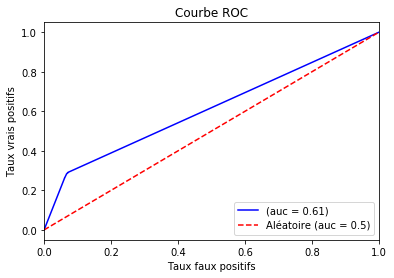

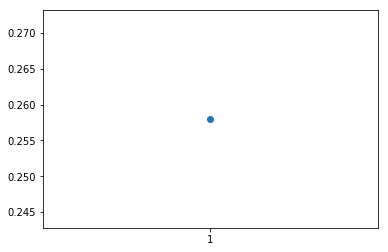

Vous voulez continuer : 


In [17]:
from sklearn.model_selection import cross_val_predict
i = 0
x = []
score = []
continuer = "OUI"
while continuer == "OUI" : 
    
    # Entrainement
    grid_clf.fit(X_train1,y_train1)

    
    # Prédiction
    y_pred = grid_clf.predict(X_train2)
    #y_pred = (grid_clf.predict_proba(X_train2)[:,1] >= 0.1).astype(bool)
    
    # Probabilité 
    probs = grid_clf.predict_proba(X_train2)
    
    # F1-score
    f1 = f1_score(y_train2, y_pred)
    print("f1-score : ", f1, "\n")
    
    i += 1
    x.append(str(i))
    score.append(f1)
    
    # classification_report
    print(classification_report(y_train2, y_pred),"\n")
    
    # Matrice de confusion
    print("Matrice de confusion : \n", pd.crosstab(y_train2, y_pred, rownames=['Réelle'], colnames=['Prédite']))
    
    # Courbe ROC
    fpr, tpr, seuils = roc_curve(y_train2, probs[:,1] ,pos_label = 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color = "blue", label = '(auc = ' + str(round(roc_auc,2)) + ')')
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--', label = 'Aléatoire (auc = 0.5)')
    plt.legend(loc = 'lower right')
    plt.title('Courbe ROC')
    plt.xlabel('Taux faux positifs')
    plt.ylabel('Taux vrais positifs')
    plt.xlim([0, 1])
    plt.show(); 
    
    # Evolution
    plt.scatter(x, score)
    plt.show()
     
    continuer = input('Vous voulez continuer : ').upper()
    if continuer == "OUI" :
        y = pd.DataFrame({"réel" : y_test , "pred" : y_pred})
        faux_negatifs = y[(y["pred"] == 0) & (y["réel"] == 1)]
        faux_negatifs_sample = faux_negatifs.sample(frac=0.1, random_state=1234)
        faux_positifs = y[(y["pred"] == 1) & (y["réel"] == 0)]
        faux_positifs_sample = faux_positifs.sample(frac=0.2, random_state=1234)
        faux = pd.concat([faux_negatifs_sample, faux_positifs_sample])
        X_train2 = X_train2[~X_train2.index.isin(faux.index)]
        y_train2 = y_train2[~y_train2.index.isin(faux.index)]
        X_train1 = pd.concat([X_train1, X_train2[X_train2.index.isin(faux.index)]])
        y_train1 = pd.concat([y_train1, y_train2[y_train2.index.isin(faux.index)]])

In [ ]:
y_test = df_test.click
X_test = df_test.drop("click", axis = 1)
X_test.drop(['auction_id','win_price','Country_language',
        'Country_language', 'Timestamp', 'Timestamp_second',
       'Timestamp_minute', 'exchange'], axis = 1, inplace = True)
col = X_test.columns
for i in col:
    if X_test[i].dtype == 'O' :
        X_test = data_valid.join(pd.get_dummies(X_test[i], prefix = i))
        X_test.drop([i], axis = 1, inplace = True)

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
svd = TruncatedSVD(n_components=15, n_iter=7)
X_test_normalized = normalize(X_test) # Normalize before svd
X_test_transformed = svd.fit_transform(X_test_normalized)
print("Pourcentage d'inertie : ", svd.explained_variance_ratio_.sum())